<a href="https://colab.research.google.com/github/vinayykkumar/Forecasting-Trends-with-Powerful-LSTM_Models_Infosys_Internship_Oct2024/blob/DHANUSH-M-P/infosys_milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#milestone 2
#stacked lstm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('pollution_test_data1.csv')
df.head()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,pollution
0,-16,4,1027,SE,3.58,0,0,128
1,-17,5,1027,SE,7.60,0,0,77
2,-16,4,1027,SE,9.39,0,0,65
3,-16,1,1028,cv,0.89,0,0,79
4,-14,0,1028,NE,1.79,0,0,93


In [ ]:
close=df['wnd_spd']
close.head()

,wnd_spd
0,3.58
1,7.60
2,9.39
3,0.89
4,1.79


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close=scaler.fit_transform(np.array(close).reshape(-1,1))


In [ ]:
training_size=int(len(close)*0.65)
test_size=len(close)-training_size
train_data,test_data=close[0:training_size,:],close[training_size:len(close),:1]

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a) # This line was incorrectly indented. Fixed to align with the for loop.
        dataY.append(dataset[i + time_step, 0]) # This line was incorrectly indented. Fixed to align with the for loop.
    return np.array(dataX), np.array(dataY)

In [ ]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
#reshape input to be [samples,time steps,features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.3999
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.3175
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.2608
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.2062
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.1251
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.2086
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.1235
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.1120
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.1105
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.1125
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.1765
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.1177
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.1146
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.1693
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.1730
Epoch 16/100
2/2

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [ ]:
#rmse
import math
from sklearn.metrics import mean_squared_error
print('Train RMSE',math.sqrt(mean_squared_error(y_train,train_predict)))
print('Test RMSE',math.sqrt(mean_squared_error(ytest,test_predict)))

Train RMSE 0.27478005604715255
Test RMSE 0.8160625225202124


In [ ]:
#r2 score
from sklearn.metrics import r2_score
print('Train R2 Score',r2_score(y_train,train_predict))
print('Test R2 Score',r2_score(ytest,test_predict))

Train R2 Score 0.548133480693452
Test R2 Score -1.726157277906316


In [ ]:
train_predict

array([[ 1.4297261 ],
       [ 1.3363035 ],
       [-0.42096668],
       [-0.54294366],
       [-0.48353255],
       [-0.469795  ],
       [-0.46725464],
       [-0.4800833 ],
       [-0.5015302 ],
       [-0.52683836],
       [-0.5511447 ],
       [-0.570513  ],
       [-0.5833021 ],
       [-0.58907783],
       [-0.5888114 ],
       [-0.5833785 ],
       [-0.5736328 ],
       [-0.5622513 ],
       [-0.5529265 ],
       [-0.5476917 ],
       [-0.5465511 ],
       [-0.5495201 ],
       [-0.5535405 ],
       [-0.5551672 ],
       [-0.5514993 ],
       [-0.54001987],
       [-0.5357185 ],
       [-0.54155105],
       [-0.5563005 ],
       [-0.5748291 ],
       [-0.59174913],
       [-0.60538507],
       [-0.61360806],
       [-0.6146404 ],
       [-0.60967815],
       [-0.5989153 ],
       [-0.58276147],
       [-0.5627042 ],
       [-0.5396565 ],
       [-0.5132559 ],
       [-0.48446882],
       [-0.45463622],
       [-0.42380834],
       [-0.39337695],
       [-0.36338758],
       [-0

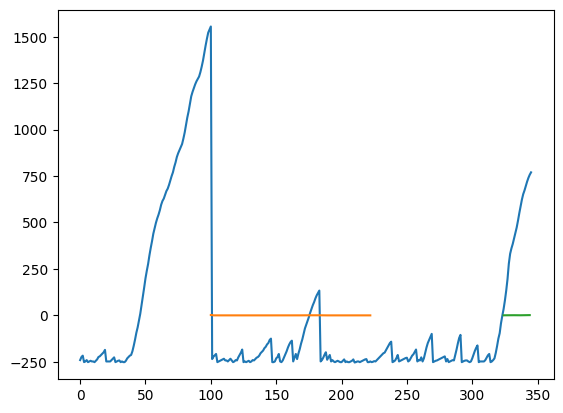

In [ ]:
#ploting
look_back=100
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close)-1, :] = test_predict
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [2]:
#bidirectional lstm
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data = pd.read_csv('pollution_test_data1.csv')
features = ['temp', 'pollution', 'wnd_spd']
data = data[features]



In [3]:

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
def create_sequences(data, look_back=24):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 24  # 24 hours look-back window for forecasting
X, y = create_sequences(data_scaled, look_back)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (257, 24, 3), Test data shape: (65, 24, 3)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout


model = Sequential()

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=64, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add the output layer (since we are predicting temperature, it's a single output)
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 128)                 │          34,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,945 (136.50 KB)

 Trainable params: 34,945 (136.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.1151 - val_loss: 0.0533
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0533 - val_loss: 0.0428
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0384 - val_loss: 0.0436
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0396 - val_loss: 0.0286
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0281 - val_loss: 0.0238
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0231 - val_loss: 0.0207
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0179 - val_loss: 0.0187
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0173 - val_loss: 0.0167
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0151 - val_loss: 0.0168
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0123 - val_loss: 0.0170
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0128 - val_loss: 0.0163
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0126 - val_loss: 0.0188
E

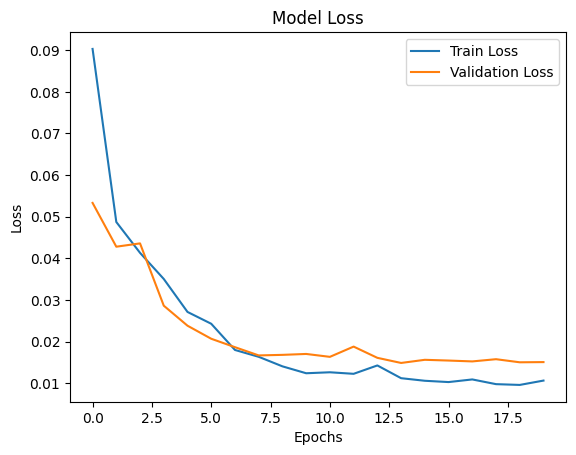

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0159 
Test Loss: 0.015069294720888138
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


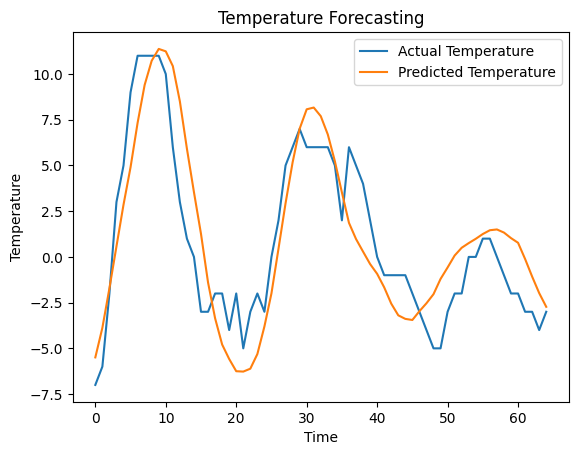

In [10]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

#  predictions
y_pred = model.predict(X_test)

# Inverse scale predictions
y_test_rescaled = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data.shape[1] - 1))], axis=1))[:, 0]
y_pred_rescaled = scaler.inverse_transform(np.concatenate([y_pred, np.zeros((y_pred.shape[0], data.shape[1] - 1))], axis=1))[:, 0]

plt.plot(y_test_rescaled, label='Actual Temperature')
plt.plot(y_pred_rescaled, label='Predicted Temperature')
plt.title('Temperature Forecasting')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 2.079610138673049
Mean Squared Error: 6.027718154731288


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.1333 - val_loss: 0.0532
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0532 - val_loss: 0.0496
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0427 - val_loss: 0.0481
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0374 - val_loss: 0.0341
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0337 - val_loss: 0.0290
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0318 - val_loss: 0.0236
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0230 - val_loss: 0.0198
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0226 - val_loss: 0.0170
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0180 - val_loss: 0.0163
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0168 - val_loss: 0.0159
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0139 - val_loss: 0.0196
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0132 - val_loss: 0.0211
E

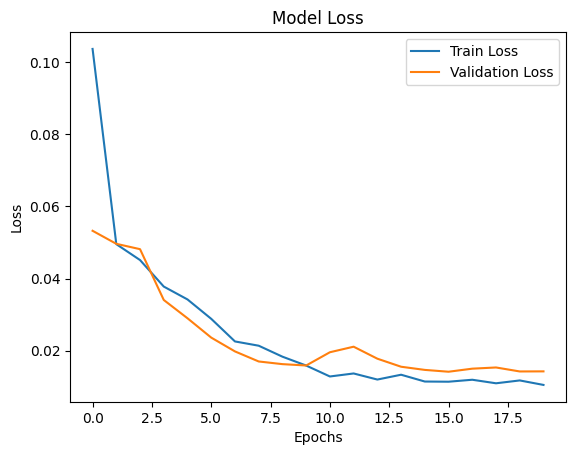

In [5]:
#vanilla
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation loss to check the performance during training
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 
Test Loss: 0.01046693418174982
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


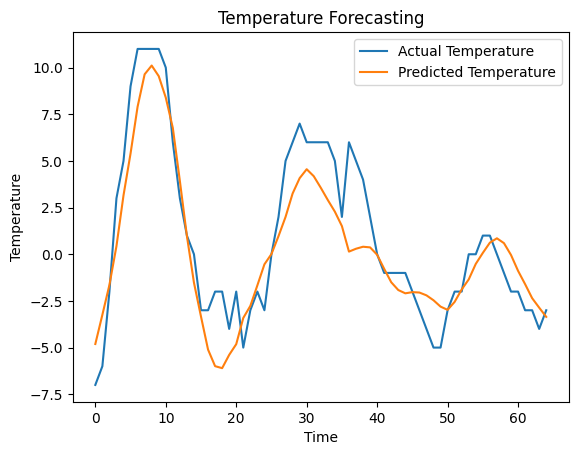

In [14]:

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


y_pred = model.predict(X_test)

# Rescale the predicted and actual values back to original scale
y_test_rescaled = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data.shape[1] - 1))], axis=1))[:, 0]
y_pred_rescaled = scaler.inverse_transform(np.concatenate([y_pred, np.zeros((y_pred.shape[0], data.shape[1] - 1))], axis=1))[:, 0]
plt.plot(y_test_rescaled, label='Actual Temperature')
plt.plot(y_pred_rescaled, label='Predicted Temperature')
plt.title('Temperature Forecasting')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()




In [16]:
#cnn lstm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

# Build the CNN-LSTM model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))  # Pooling layer to reduce dimensionality

# Add another Conv1D layer for feature extraction
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Add an LSTM layer for sequential learning
model.add(LSTM(units=50, return_sequences=False))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add the output layer (since we're predicting temperature)
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 22, 64)              │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 9, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          16,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,467 (91.67 KB)

 Trainable params: 23,467 (91.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.1658 - val_loss: 0.0797
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0676 - val_loss: 0.0564
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0570 - val_loss: 0.0717
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0573 - val_loss: 0.0563
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0595 - val_loss: 0.0498
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0529 - val_loss: 0.0561
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0528 - val_loss: 0.0518
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0509 - val_loss: 0.0575
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0462 - val_loss: 0.0493
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0443 - val_loss: 0.0454
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0456 - val_loss: 0.0421
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0365 - val_loss: 0.0472
Epoc

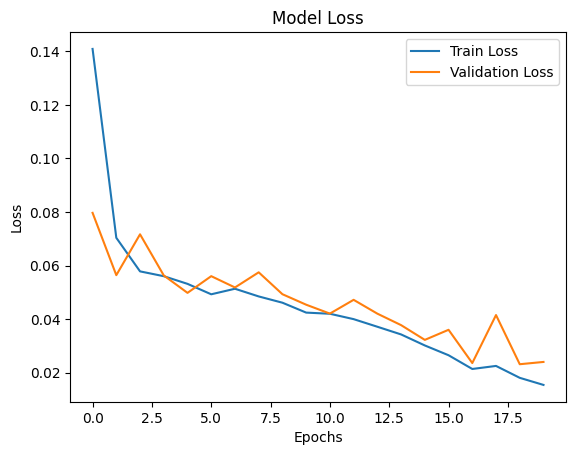

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 
Test Loss: 0.024039441719651222


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step


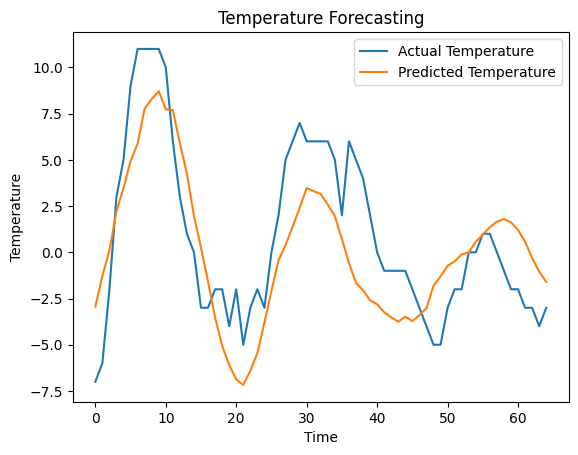

In [18]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
y_pred = model.predict(X_test)

# Inverse scale predictions and actual values (because the data was scaled)
y_test_rescaled = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data.shape[1] - 1))], axis=1))[:, 0]
y_pred_rescaled = scaler.inverse_transform(np.concatenate([y_pred, np.zeros((y_pred.shape[0], data.shape[1] - 1))], axis=1))[:, 0]
plt.plot(y_test_rescaled, label='Actual Temperature')
plt.plot(y_pred_rescaled, label='Predicted Temperature')
plt.title('Temperature Forecasting')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = math.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 2.7406072130570043
Root Mean Squared Error (RMSE): 3.100931547167099


In [29]:
#convLSTM
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data = pd.read_csv('pollution_test_data1.csv')


print(data.head())




data = data[['temp', 'pollution', 'wnd_spd']]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences (required for ConvLSTM input)
def create_sequences(data, look_back=24):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :])  # Sequence of look_back time steps
        y.append(data[i + look_back, 0])     # Target value (e.g., 'temperature')
    return np.array(X), np.array(y)

look_back = 24  # Use 24-hour look-back window
X, y = create_sequences(data_scaled, look_back)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape data for ConvLSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1, X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1, X_test.shape[2])

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


   dew  temp  press wnd_dir  wnd_spd  snow  rain  pollution
0  -16     4   1027      SE     3.58     0     0        128
1  -17     5   1027      SE     7.60     0     0         77
2  -16     4   1027      SE     9.39     0     0         65
3  -16     1   1028      cv     0.89     0     0         79
4  -14     0   1028      NE     1.79     0     0         93
Training data shape: (257, 24, 1, 1, 3), Test data shape: (65, 24, 1, 1, 3)


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense, Dropout

# Build the ConvLSTM model
model = Sequential()

# Add the ConvLSTM2D layer
model.add(ConvLSTM2D(filters=64, kernel_size=(1, 1), activation='relu',
                     input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4]),
                     return_sequences=False))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add the output layer (since we are predicting temperature, it's a single value)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the model architecture
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_lstm2d_4 (ConvLSTM2D)           │ (None, 1, 1, 64)            │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 1, 1)             │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,473 (68.25 KB)

 Trainable params: 17,473 (68.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.1582 - val_loss: 0.1230
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0690 - val_loss: 0.0540
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0655 - val_loss: 0.0695
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0538 - val_loss: 0.0641
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0538 - val_loss: 0.0568
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0622 - val_loss: 0.0557
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0540 - val_loss: 0.0606
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0534 - val_loss: 0.0572
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0503 - val_loss: 0.0612
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0534 - val_loss: 0.0588
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0500 - val_loss: 0.0579
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0516 - val_loss: 0.0575
E

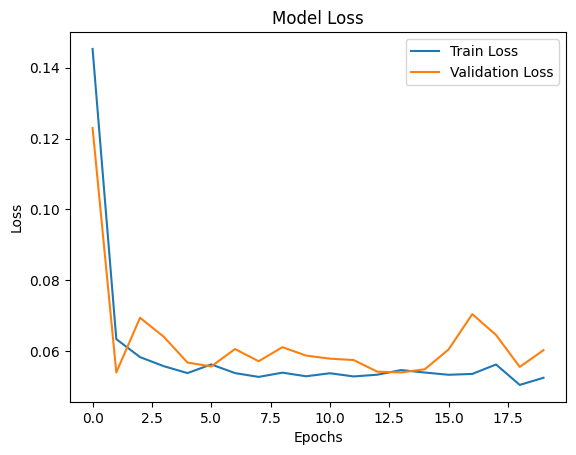

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
